In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file as pandas dataframe
df_diabetes = pd.read_csv('./diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
df_diabetes.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df_diabetes.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0      4631
2.0     35346
dtype: int64

In [5]:
df_diabetes.isnull().sum().sort_values(ascending=False)

Diabetes_012            0
HighBP                  0
Education               0
Age                     0
Sex                     0
DiffWalk                0
PhysHlth                0
MentHlth                0
GenHlth                 0
NoDocbcCost             0
AnyHealthcare           0
HvyAlcoholConsump       0
Veggies                 0
Fruits                  0
PhysActivity            0
HeartDiseaseorAttack    0
Stroke                  0
Smoker                  0
BMI                     0
CholCheck               0
HighChol                0
Income                  0
dtype: int64

In [6]:
df_diabetes.shape

(253680, 22)

In [7]:
df_diabetes.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
# Create new dataset combining PreDiabetes and diabetes together 

In [9]:
df_Diab_NoDiab=df_diabetes

In [10]:
df_Diab_NoDiab['Diabetes_012'] = df_Diab_NoDiab['Diabetes_012'].replace({2:1})

In [11]:
# Result will have only binary values 0 and 1 indicating No Diabetes and Diabetes respectively
df_Diab_NoDiab.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0     39977
dtype: int64

C:\Users\radhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


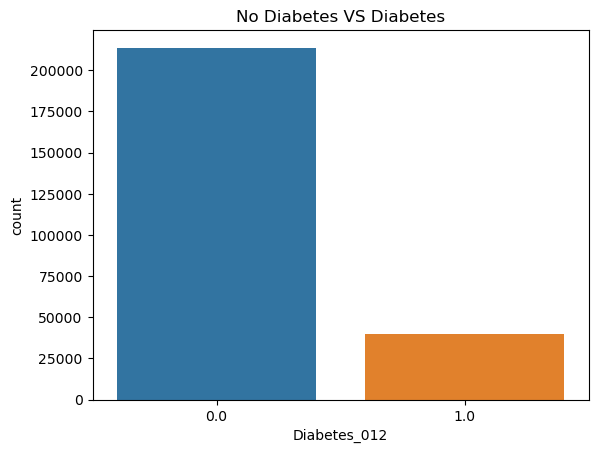

In [12]:
sns.countplot(df_Diab_NoDiab['Diabetes_012'])
labels = ["no diabetes", "diabetes"]
plt.title("No Diabetes VS Diabetes")
plt.show()

In [13]:
# Create balanced dataset for the Diabetes prediction

In [14]:
# find the correlation between the dependent and independent factors 
# select the most correlated features for diabetes prediction 

<AxesSubplot:>

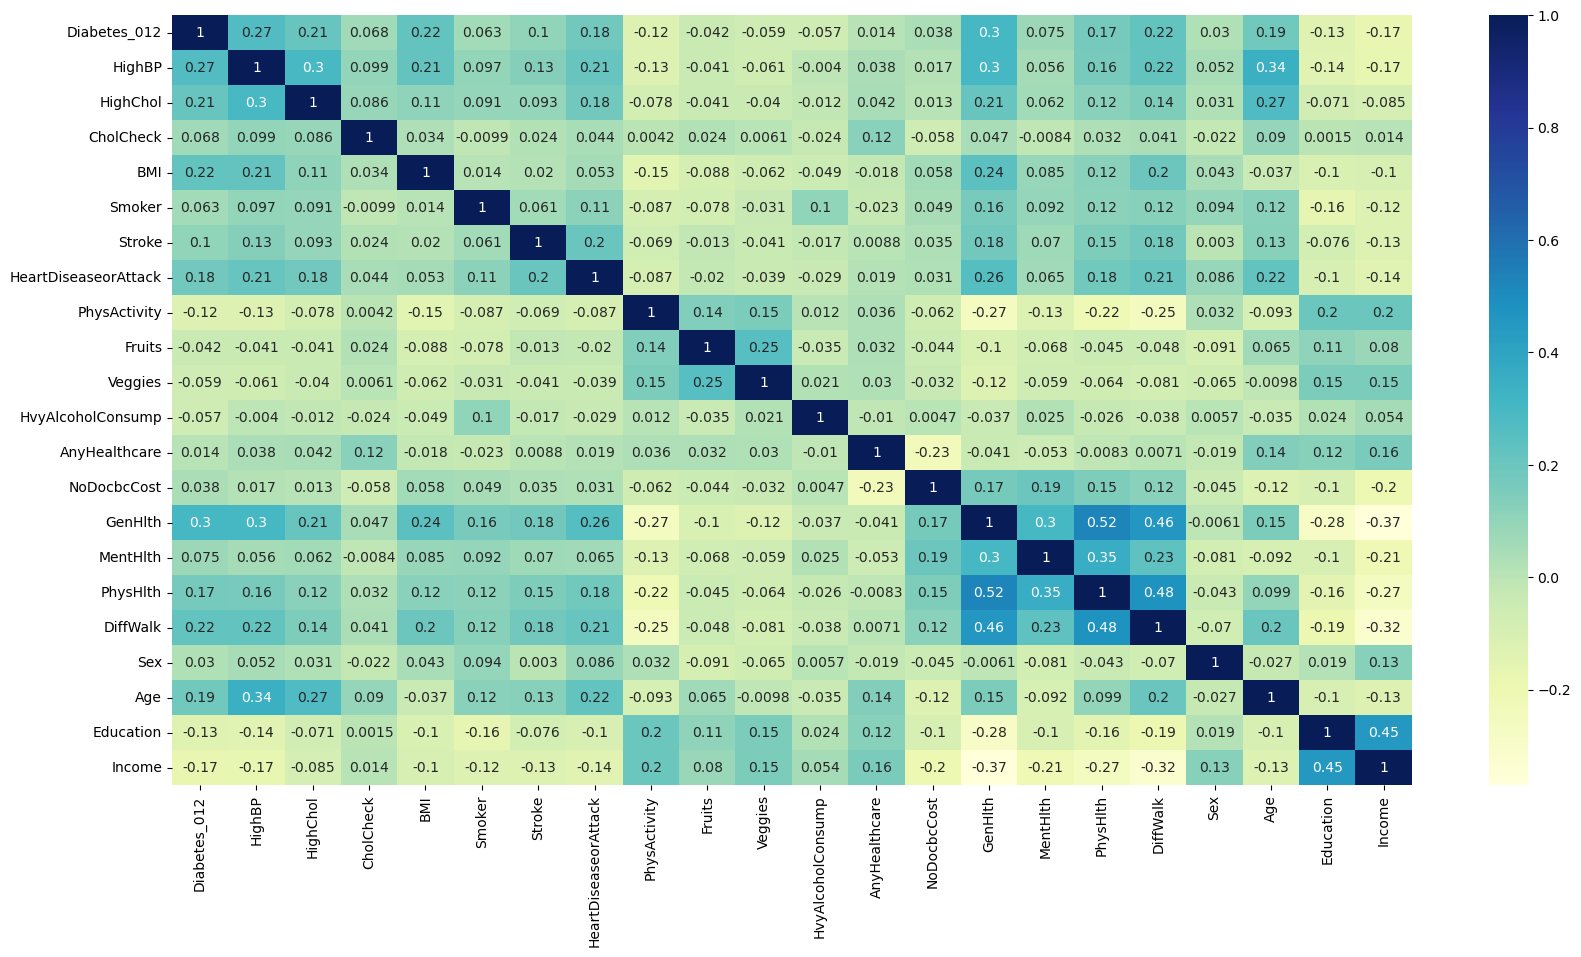

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df_Diab_NoDiab.corr(), annot=True, cmap="YlGnBu")

In [16]:

# create dataset with equired variables 
df_Balanced_final= df_Diab_NoDiab[['Diabetes_012', 'HighBP', 'BMI','GenHlth','Age','Income','Sex','HeartDiseaseorAttack','PhysHlth']].copy()
df_Diab_NoDiab.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [17]:
df_Balanced_final.groupby(['Diabetes_012']).size()

Diabetes_012
0.0    213703
1.0     39977
dtype: int64

In [18]:
# Predict Diabetes using Random Forest Classifier 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [20]:
#DfDependent
DfDependent=df_Balanced_final[['Diabetes_012']].copy()

In [21]:
#DfInDependent
DfInDependent=df_Balanced_final[['HighBP','BMI','GenHlth','Age','Income','Sex','HeartDiseaseorAttack','PhysHlth']].copy()

### Manage Imbalanced Data  - Undersampling

In [22]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
X=DfInDependent
y=DfDependent
rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X,y)

In [23]:
X_res.shape

(79954, 8)

In [24]:
y_res.shape

(79954, 1)

In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55) # 80% training and 20% test
X_train.shape, X_test.shape  # the shape of X_train and X_test

((202944, 8), (50736, 8))

In [26]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [27]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
classifyDiabetes = RandomForestClassifier()
classifyDiabetes.fit(X_train,y_train)
# predictions
diabetes_predict = classifyDiabetes.predict(X_test)

C:\Users\radhi\AppData\Local\Temp\ipykernel_20144\119729444.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifyDiabetes.fit(X_train,y_train)


In [28]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, diabetes_predict))

Accuracy: 0.8269276253547777


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print("***** Confusion_Matrix *****")
print(confusion_matrix(y_test, diabetes_predict))
print('\n')

***** Confusion_Matrix *****
[[40056  2679]
 [ 6102  1899]]




In [30]:
conmatr = confusion_matrix(y_test, diabetes_predict)

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confn_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix- Decision Tree',
                          cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

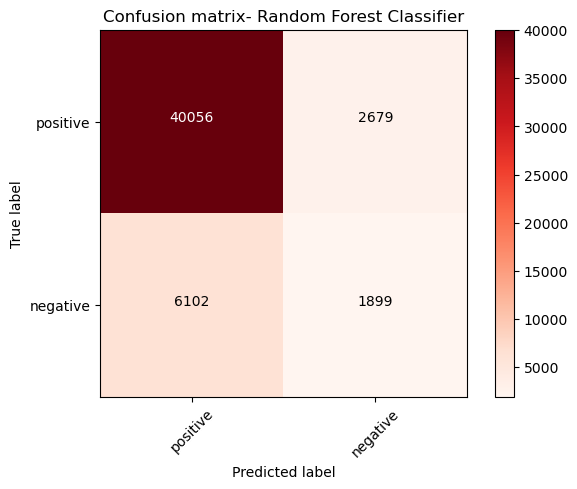

In [66]:

conmatr = confusion_matrix(y_test, diabetes_predict)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr,rating_list)

In [33]:
print("**** Classification_Report ****")
print(classification_report(y_test, diabetes_predict))
print('\n')

**** Classification_Report ****
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     42735
         1.0       0.41      0.24      0.30      8001

    accuracy                           0.83     50736
   macro avg       0.64      0.59      0.60     50736
weighted avg       0.80      0.83      0.81     50736





In [34]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logregDiab = LogisticRegression()
logregDiab.fit(X_train , y_train)
# predictions
diabetes_logpredict = logregDiab.predict(X_test)

C:\Users\radhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, diabetes_logpredict))

Accuracy: 0.8453563544623147


In [36]:
print("***** Confusion_Matrix *****")
print(confusion_matrix(y_test, diabetes_logpredict))
print('\n')

***** Confusion_Matrix *****
[[41615  1120]
 [ 6726  1275]]




In [37]:
print("**** Classification_Report ****")
print(classification_report(y_test, diabetes_logpredict))
print('\n')

**** Classification_Report ****
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42735
         1.0       0.53      0.16      0.25      8001

    accuracy                           0.85     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.81      0.85      0.81     50736





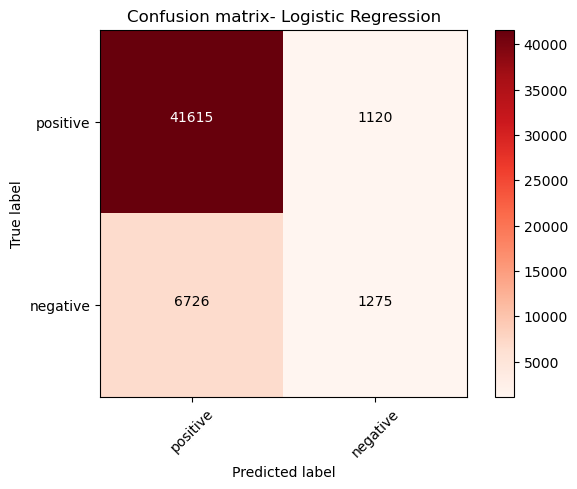

In [69]:
conmatr_log = confusion_matrix(y_test, diabetes_logpredict)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr_log,rating_list)

In [39]:
# DecisionTree 
from sklearn.tree import DecisionTreeClassifier
decTreeDiab = DecisionTreeClassifier(max_depth=5)
decTreeDiab.fit(X_train , y_train)
# predictions
DecTreediabetes_logpredict = decTreeDiab.predict(X_test)


In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, DecTreediabetes_logpredict))

Accuracy: 0.8482931251970987


In [41]:
print("***** Confusion_Matrix *****")
print(confusion_matrix(y_test, DecTreediabetes_logpredict))
print('\n')

***** Confusion_Matrix *****
[[41885   850]
 [ 6847  1154]]




In [42]:
print("**** Classification_Report ****")
print(classification_report(y_test, DecTreediabetes_logpredict))
print('\n')

**** Classification_Report ****
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42735
         1.0       0.58      0.14      0.23      8001

    accuracy                           0.85     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.81      0.85      0.81     50736





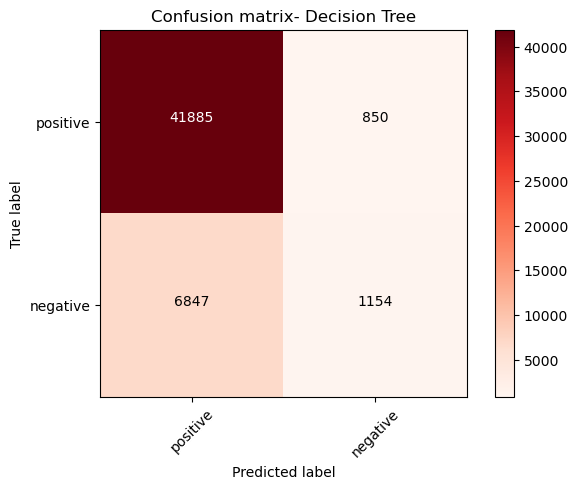

In [72]:
conmatr_dectree = confusion_matrix(y_test, DecTreediabetes_logpredict)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr_dectree,rating_list)

In [44]:
# naive_bayes
from sklearn.naive_bayes import BernoulliNB
naive_bayes_Diab = BernoulliNB()
naive_bayes_Diab.fit(X_train , y_train)
# predictions
naive_bayes_Diab_logpredict = naive_bayes_Diab.predict(X_test)

C:\Users\radhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, naive_bayes_Diab_logpredict))

Accuracy: 0.8191422264269946


In [46]:
print("***** Confusion_Matrix *****")
print(confusion_matrix(y_test, naive_bayes_Diab_logpredict))
print('\n')

***** Confusion_Matrix *****
[[38452  4283]
 [ 4893  3108]]




In [47]:
print("**** Classification_Report ****")
print(classification_report(y_test, naive_bayes_Diab_logpredict))
print('\n')

**** Classification_Report ****
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     42735
         1.0       0.42      0.39      0.40      8001

    accuracy                           0.82     50736
   macro avg       0.65      0.64      0.65     50736
weighted avg       0.81      0.82      0.82     50736





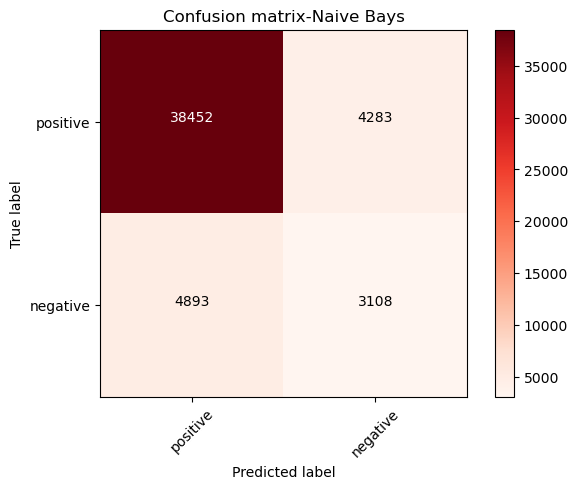

In [48]:
conmatr_bern = confusion_matrix(y_test, naive_bayes_Diab_logpredict)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr_bern,rating_list)

### Manage Imbalanced Data  - Oversampling

In [49]:
ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X,y)

In [50]:
X_res.shape

(427406, 8)

In [51]:
y_res.shape

(427406, 1)

In [52]:
from sklearn.preprocessing import StandardScaler
scalar_under = StandardScaler()
X_train = scalar_under.fit_transform(X_train)
X_test = scalar_under.fit_transform(X_test)

In [53]:
# random forest model creation
classifyDiabetes_1 = RandomForestClassifier()
classifyDiabetes_1.fit(X_train,y_train)
# predictions
diabetes_predict_underSampling = classifyDiabetes_1.predict(X_test)

C:\Users\radhi\AppData\Local\Temp\ipykernel_20144\50219606.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifyDiabetes_1.fit(X_train,y_train)


In [54]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, diabetes_predict_underSampling))

Accuracy: 0.8260406811731315


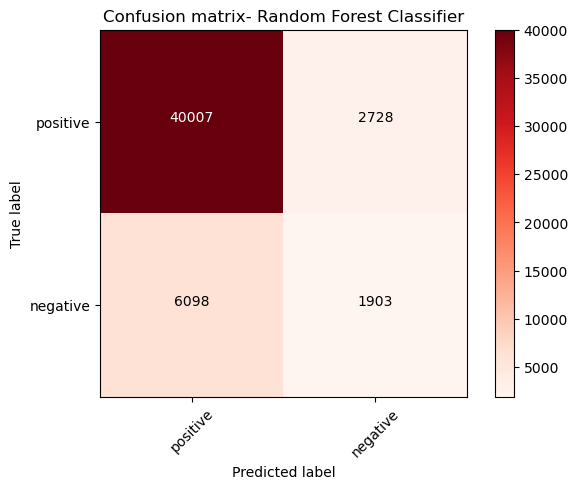

In [67]:
conmatr_over = confusion_matrix(y_test, diabetes_predict_underSampling)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr_over,rating_list)

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logregDiab_1 = LogisticRegression()
logregDiab_1.fit(X_train , y_train)
# predictions
diabetes_logpredict_1 = logregDiab_1.predict(X_test)

C:\Users\radhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, diabetes_logpredict_1))

Accuracy: 0.8453563544623147


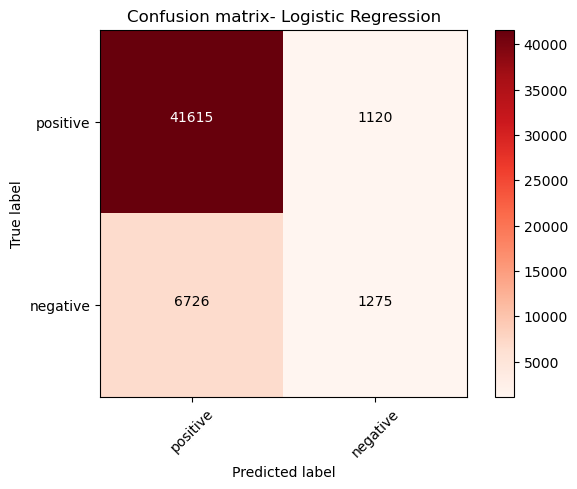

In [70]:
conmatr_log1 = confusion_matrix(y_test, diabetes_logpredict_1)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr_log1,rating_list)

In [59]:
# DecisionTree 
from sklearn.tree import DecisionTreeClassifier
decTreeDiab_1 = DecisionTreeClassifier(max_depth=5)
decTreeDiab_1.fit(X_train , y_train)
# predictions
DecTreediabetes_logpredict_1 = decTreeDiab_1.predict(X_test)

In [60]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, DecTreediabetes_logpredict_1))

Accuracy: 0.8482931251970987


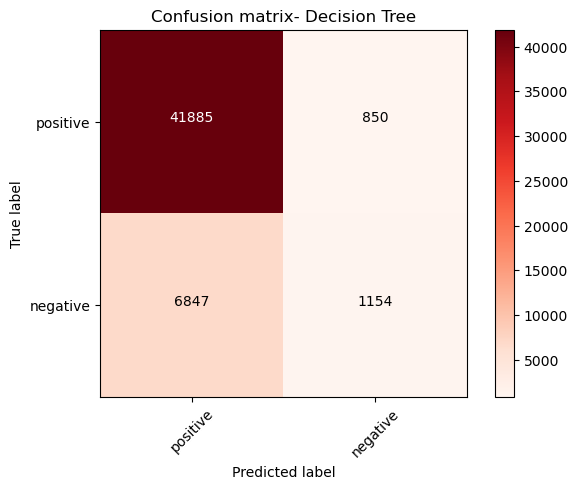

In [73]:
conmatr_dectree1 = confusion_matrix(y_test, DecTreediabetes_logpredict_1)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr_dectree1,rating_list)

In [62]:
# naive_bayes
from sklearn.naive_bayes import BernoulliNB
naive_bayes_Diab_1 = BernoulliNB()
naive_bayes_Diab_1.fit(X_train , y_train)
# predictions
naive_bayes_Diab_logpredict_1 = naive_bayes_Diab_1.predict(X_test)

C:\Users\radhi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, naive_bayes_Diab_logpredict_1))

Accuracy: 0.8191422264269946


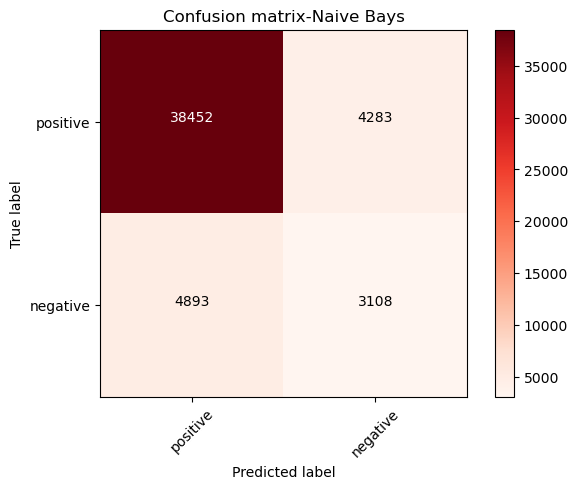

In [64]:
conmatr_bern = confusion_matrix(y_test, naive_bayes_Diab_logpredict_1)
rating_list = ['positive', 'negative']
plot_confn_matrix(conmatr_bern,rating_list)